In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import torch

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/eeg-psychiatric-disorders-dataset/EEG.machinelearing_data_BRMH.csv


In [2]:
os.path

<module 'posixpath' from '/opt/conda/lib/python3.7/posixpath.py'>

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('../input/eeg-psychiatric-disorders-dataset/EEG.machinelearing_data_BRMH.csv')

In [5]:
df.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [6]:
df.describe()

,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


In [7]:
length_col = len(df.columns)

In [8]:
len(df['main.disorder'].unique())

7

In [9]:
len(df['specific.disorder'].unique())

12

In [10]:
# y label
df['specific.disorder'].unique()

array(['Alcohol use disorder', 'Acute stress disorder',
       'Depressive disorder', 'Healthy control',
       'Behavioral addiction disorder', 'Obsessive compulsitve disorder',
       'Schizophrenia', 'Panic disorder', 'Social anxiety disorder',
       'Posttraumatic stress disorder', 'Adjustment disorder',
       'Bipolar disorder'], dtype=object)

In [11]:
# 
df['main.disorder'].unique()

array(['Addictive disorder', 'Trauma and stress related disorder',
       'Mood disorder', 'Healthy control',
       'Obsessive compulsive disorder', 'Schizophrenia',
       'Anxiety disorder'], dtype=object)

# EDA

In [12]:
columns = df.columns

In [13]:
columns

Index(['no.', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1149)

In [14]:
for col in columns:
    null_count = df[col].isna().sum()
    if null_count>0:      
        print(f'{col} null values: {null_count}')

education null values: 15
IQ null values: 13
Unnamed: 122 null values: 945


Removing unnamed column -> no 122

In [15]:
df['Unnamed: 122']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
940   NaN
941   NaN
942   NaN
943   NaN
944   NaN
Name: Unnamed: 122, Length: 945, dtype: float64

In [16]:
df = df.drop(columns=['Unnamed: 122'])

In [17]:
# df['Unnamed: 122']

# removed unnamed column

In [18]:
# float64(1143), int64(1), object(4)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1148 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1143), int64(1), object(4)
memory usage: 8.3+ MB


In [19]:
df.loc[:,:'specific.disorder'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   no.                945 non-null    int64  
 1   sex                945 non-null    object 
 2   age                945 non-null    float64
 3   eeg.date           945 non-null    object 
 4   education          930 non-null    float64
 5   IQ                 932 non-null    float64
 6   main.disorder      945 non-null    object 
 7   specific.disorder  945 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 59.2+ KB


In [20]:
#discrete column
dis_col = df.select_dtypes(include=['object']).columns
#continuous column
con_col = df.select_dtypes(include=['int64', 'float64']).columns

In [21]:
dis_col

Index(['sex', 'eeg.date', 'main.disorder', 'specific.disorder'], dtype='object')

In [22]:
con_col

Index(['no.', 'age', 'education', 'IQ', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       'AB.A.delta.c.F7', 'AB.A.delta.d.F3', 'AB.A.delta.e.Fz',
       'AB.A.delta.f.F4',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1144)

In [23]:
# removing eeg date as it is not necessary for the 

dis_col = dis_col.drop('eeg.date')

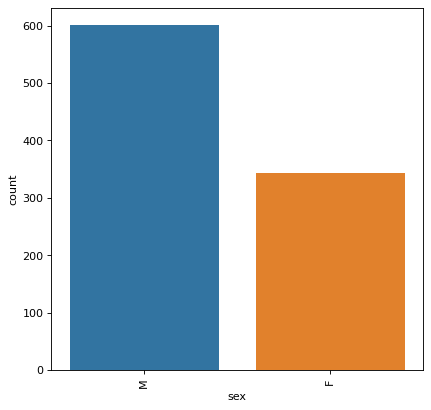

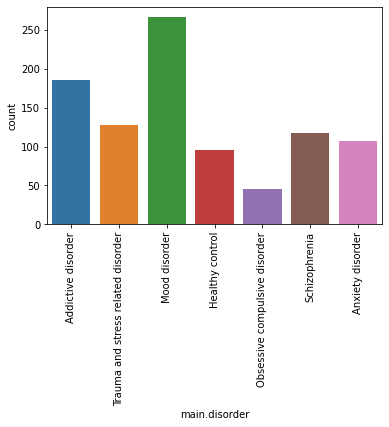

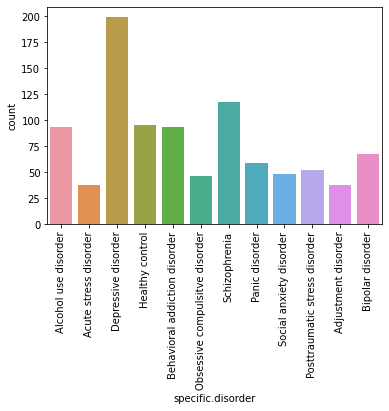

In [24]:
plt.figure(figsize=(6,6),dpi=80)
for dis in dis_col:
    sns.countplot(x=dis,data=df)
    plt.xticks(rotation=90)
    plt.show()

### CountPlot:

- **Male, Female** -> We have almost double male subjects than female subjects 
- **Main disorder** -> We have 6 main disorders and one is Healthy Control **(HC)**, Mood Disorder has the most data while Obsessive Compulsive Disorder **(OCD)** has the lowest amount of data
- **Specific Disorder** -> We have a total of 9 specific disorders where Schizophrenia, OCD and HC  have no specific disorder  others have 2-3 specific disorders 

main.disorder                       specific.disorder             
Trauma and stress related disorder  Acute stress disorder              38
                                    Adjustment disorder                38
Obsessive compulsive disorder       Obsessive compulsitve disorder     46
Anxiety disorder                    Social anxiety disorder            48
Trauma and stress related disorder  Posttraumatic stress disorder      52
Anxiety disorder                    Panic disorder                     59
Mood disorder                       Bipolar disorder                   67
Addictive disorder                  Alcohol use disorder               93
                                    Behavioral addiction disorder      93
Healthy control                     Healthy control                    95
Schizophrenia                       Schizophrenia                     117
Mood disorder                       Depressive disorder               199
dtype: int64

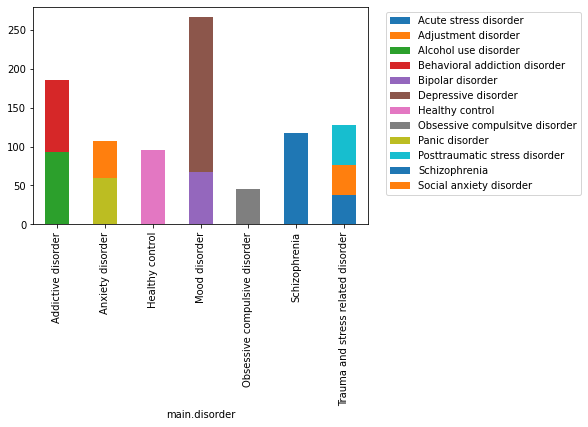

In [25]:
fig,ax = plt.subplots()
disorder_counts = df.groupby(['main.disorder', 'specific.disorder']).size()
display(disorder_counts.sort_values())
disorder_counts.unstack('specific.disorder')\
    .plot(kind='bar', stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

### Observation:

Stacking the specific disorder over main disorder, from the above plot we can see that 
**HC, OCD and Schizophrenia** do not have specific disorders

- **Addictive Disorder** - Alcohol use disorder, Behavioral addiction disorder
- **Anxiety Disorder**   - Social Anxiety, Panic Disorder
- **Mood Disorder**      - Bipolar Disorder, Depressive Disorder
- **Trauma and Stress Related Disorder** - Posttraumatic stress disorder, Acute stress disorder, Adjustment Disorder


## Sex vs Main Disorder 

main.disorder                       sex
Obsessive compulsive disorder       F        8
Addictive disorder                  F       22
Anxiety disorder                    F       28
Healthy control                     F       35
Obsessive compulsive disorder       M       38
Trauma and stress related disorder  M       44
Schizophrenia                       F       52
Healthy control                     M       60
Schizophrenia                       M       65
Anxiety disorder                    M       79
Trauma and stress related disorder  F       84
Mood disorder                       F      115
                                    M      151
Addictive disorder                  M      164
dtype: int64

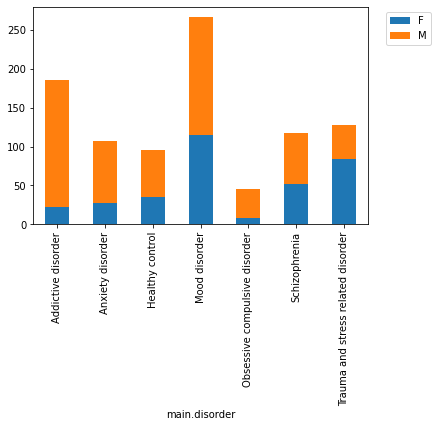

In [26]:
fig,ax = plt.subplots()
disorder_counts = df.groupby(['main.disorder', 'sex']).size()
display(disorder_counts.sort_values())
disorder_counts.unstack('sex')\
    .plot(kind='bar', stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In the above plot, we can see that the sex distribution of the Main Disorder where the most balanced proportion of Male to Female is in **Mood Disorder** followed by **Schizophrenia**. 

In [27]:
con_col

Index(['no.', 'age', 'education', 'IQ', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       'AB.A.delta.c.F7', 'AB.A.delta.d.F3', 'AB.A.delta.e.Fz',
       'AB.A.delta.f.F4',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1144)

In [28]:
# dropping no. as not necessary for analysis
con_col = con_col.drop('no.')
con_col

Index(['age', 'education', 'IQ', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       'AB.A.delta.c.F7', 'AB.A.delta.d.F3', 'AB.A.delta.e.Fz',
       'AB.A.delta.f.F4', 'AB.A.delta.g.F8',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1143)

In [29]:
type(con_col)

pandas.core.indexes.base.Index

In [30]:
selected_con = con_col[:3]
selected_con

Index(['age', 'education', 'IQ'], dtype='object')

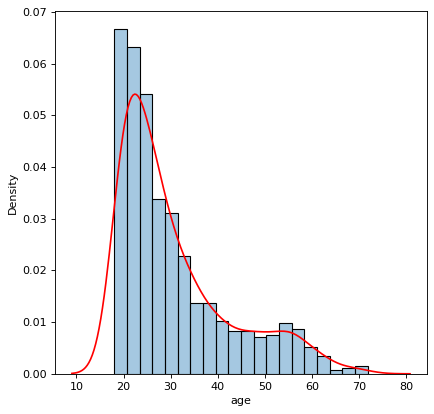

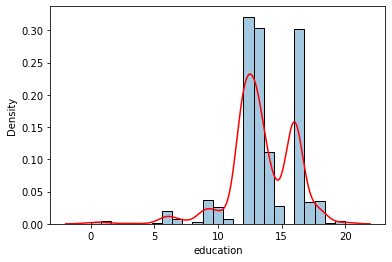

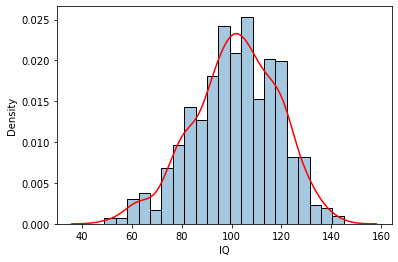

In [31]:
# first, let's only plot age, education and IQ 


plt.figure(figsize=(6, 6), dpi=80)

for con in selected_con:
    ax = sns.histplot(x = con, data = df,kde=False,alpha=0.4, stat='density')
    sns.kdeplot(data=df, x=con, color='red', ax=ax)
    plt.show()